###Deep Learning for MNIST Handwritten Digit Classification using PyTorch

In [1]:
import torch
from torchvision import datasets, transforms

# Mengatur transformasi data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Memuat dataset pelatihan dan pengujian
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 101533939.09it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 56791230.11it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23010631.76it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10101022.68it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

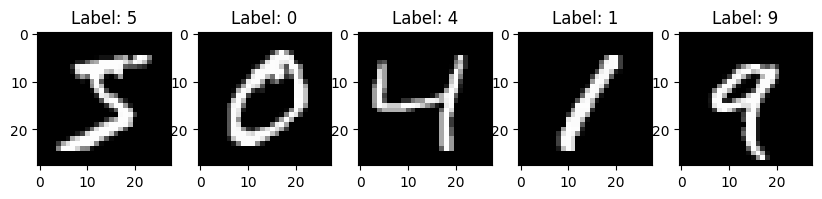

In [2]:
import matplotlib.pyplot as plt

# Menampilkan beberapa contoh dari dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    img, label = train_dataset[i]
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(f'Label: {label}')
plt.show()

In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flattening input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Inisialisasi model
model = SimpleNN()

In [5]:
# Definisikan fungsi loss dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
# Melatih model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch + 1}/{num_epochs}] Loss: {running_loss / len(train_loader):.4f}')


Epoch [1/10] Loss: 0.3858
Epoch [2/10] Loss: 0.1953
Epoch [3/10] Loss: 0.1416
Epoch [4/10] Loss: 0.1173
Epoch [5/10] Loss: 0.0970
Epoch [6/10] Loss: 0.0857
Epoch [7/10] Loss: 0.0776
Epoch [8/10] Loss: 0.0703
Epoch [9/10] Loss: 0.0628
Epoch [10/10] Loss: 0.0601


In [9]:
# Evaluasi model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 97.29%


Hasil dari kode di atas adalah performa model Neural Network dalam mengklasifikasikan digit tulisan tangan MNIST. Di bawah ini adalah beberapa hal yang dapat dijelaskan tentang hasilnya:

Loss pada Set Pelatihan: Dalam setiap epoch pelatihan, kita mencetak loss yang dihitung selama proses pelatihan. Loss ini merupakan pengukuran seberapa baik model kita mengevaluasi data pelatihan. Idealnya, loss ini harus berkurang seiring dengan berjalannya waktu, menunjukkan bahwa model semakin baik dalam mengidentifikasi digit.

Akurasi pada Set Pengujian: Setelah pelatihan selesai, model diuji pada dataset pengujian yang belum pernah dilihat sebelumnya. Akurasi pada set pengujian mencerminkan seberapa baik model dapat menggeneralisasi dari data pelatihan ke data yang tidak pernah dilihat sebelumnya. Akurasi yang tinggi menunjukkan bahwa model berhasil dalam mengklasifikasikan digit.